In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 
from prob_new import *
from aps_cont import *
from mcmc import *

# Augmented Probability Simulation

## Attacker's APS for given decision

In [2]:
a_opt, a_d = innerAPS(0.9, a_util, prob, N_inner=100000, burnin=0.5, prec = 0.01, info=True)

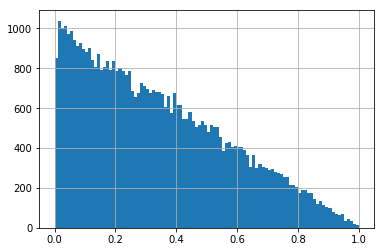

In [3]:
a_d.hist(bins = int(1.0/0.01))
plt.show()

In [ ]:
a_opt

## Defender's APS

In [5]:
d_opt, d_d = aps_adg(d_util, a_util, prob, N_aps=10000, burnin=0.5, N_inner = 1000, prec=0.01, info=True)

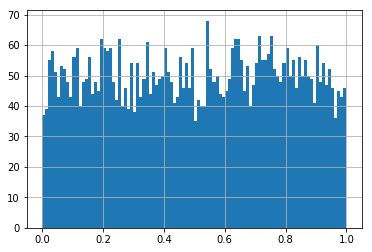

In [6]:
d_d.hist(bins = int(1.0/0.01))
plt.show()

In [8]:
d_opt

0.5450645042039834

# Monte Carlo

## Defender's MC

In [14]:
d_opt, a_opt, psi_d, psi_a, times = mcmc_adg(d_values, a_values, d_util, a_util, prob, prob,
             mcmc_iters=1000, info=True)

In [15]:
d_opt

0.0

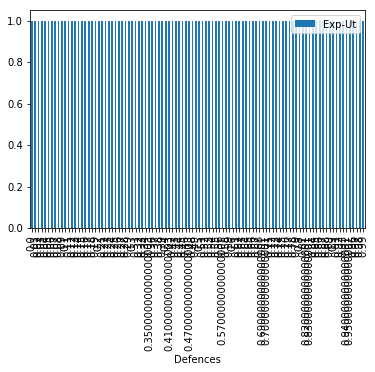

In [17]:
df = pd.DataFrame({"Defences":d_values, "Exp-Ut":psi_d})
df.plot.bar(x='Defences', y='Exp-Ut')
plt.show()

In [19]:
psi_d

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     